# Lecture 2: word vector representation 

In [1]:
import nltk
import random
import string
import operator
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

%matplotlib inline

## Exercise 1: tokenization

In this exercise you define a couple of tokenizers and use them on a toy sentence

In [2]:
test_sentence_1 = 'The quick brown fox jumps over the lazy dog.'

### 1.1 - delimiter tokenization

In [3]:
def tokenize_by_split(text):
    """Tokenizes a given string of text by splitting words by whitespace"""
    tokens = text.split(' ')
    # your code goes here
    return tokens

In [4]:
tokenize_by_split(test_sentence_1)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']

In [5]:
assert tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                              'jumps', 'over', 'the', 'lazy', 'dog.']
print('done')

done


### 1.2 - removing punctuation

In [6]:
def remove_punkt_and_tokenize_by_split(text):
    """Replaces punktuation from given string of text with whitespace, then
    tokenizes it by splitting words by whitespace"""
    punkt_symbols = string.punctuation

    # your code goes here
    sentence = ''.join(word for word in text if word not in punkt_symbols)
    removed = tokenize_by_split(sentence)
    return removed

In [7]:
remove_punkt_and_tokenize_by_split(test_sentence_1)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [8]:
assert remove_punkt_and_tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                                               'jumps', 'over', 'the', 'lazy', 'dog']
print('done')

done


### 1.3 - using regular expression

In [9]:
test_sentence_2 = "This is a test that isn't so simple: 1.23"

In [10]:
def tokenize_by_regex(text):
    """Tokenizes a given string of text by applying the 'tokenize' method 
    of the provided 'tokenizer' object"""
    tokenizer = nltk.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    # your code goes here
    return tokens

In [11]:
assert tokenize_by_regex(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                              'isn', 't', 'so', 'simple', '1', '23']
print('done')

done


### 1.4 - using an advanced tokenizer model

In [12]:
#Use spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

In [13]:
def tokenize_by_punkt_model(text):
    """Tokenizes a given string of text by applying spaCy nlp"""
    # your code goes here
    doc = nlp(text)
    tokens = [token.text for token in doc]

    return tokens

In [14]:
txt = nlp('Max Hermann was my friend.')
txt.text

'Max Hermann was my friend.'

In [15]:
assert tokenize_by_punkt_model(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                                    'is', "n't", 'so', 'simple', ':', '1.23']
print('done')

done


## Exercise 2: n-grams and stopwords

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. First of all, let's get it!

In [16]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/igel/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

The Brown corpus contains texts from different categories

In [17]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [18]:
adv_sents_ = list(nltk.corpus.brown.sents(categories=['adventure', 'science_fiction']))


In [19]:
print(len(adv_sents_))

5585


Sentences from each category can be accessed as follows

In [20]:
adv_sents = list(nltk.corpus.brown.sents(categories='adventure'))
print(len(adv_sents))

4637


In [21]:
adv_sents[:2]

[['Dan',
  'Morgan',
  'told',
  'himself',
  'he',
  'would',
  'forget',
  'Ann',
  'Turner',
  '.'],
 ['He', 'was', 'well', 'rid', 'of', 'her', '.']]

Let's see what are the most frequent unigrams in the 'adventure' category

In [22]:
# joins a list of lists of tokens into a one large string of text
words_of_text = list(itertools.chain.from_iterable(adv_sents))
adventure_text = ' '.join(list(itertools.chain.from_iterable(adv_sents)))

In [23]:
words_of_text[:10]

['Dan',
 'Morgan',
 'told',
 'himself',
 'he',
 'would',
 'forget',
 'Ann',
 'Turner',
 '.']

In [24]:
adventure_text[:60]

'Dan Morgan told himself he would forget Ann Turner . He was '

In [25]:
# uses the tokenizer function we've just written to tokenize text
adventure_tokens = tokenize_by_regex(adventure_text)

In [26]:
adventure_tokens[:10]

['Dan',
 'Morgan',
 'told',
 'himself',
 'he',
 'would',
 'forget',
 'Ann',
 'Turner',
 'He']

In [27]:
# turns each token to lowercase (simple normalization technique)
lowered_tokens = [token.lower() for token in adventure_tokens]
print(len(lowered_tokens))

60004


In [28]:
# counts the number of occurances for each unigram
word_counter = collections.Counter(lowered_tokens)  # dictionary key = word, value = occurance
print(word_counter['dan'])
print(word_counter.most_common(3) ) # list of sets

26
[('the', 3781), ('and', 1710), ('a', 1445)]


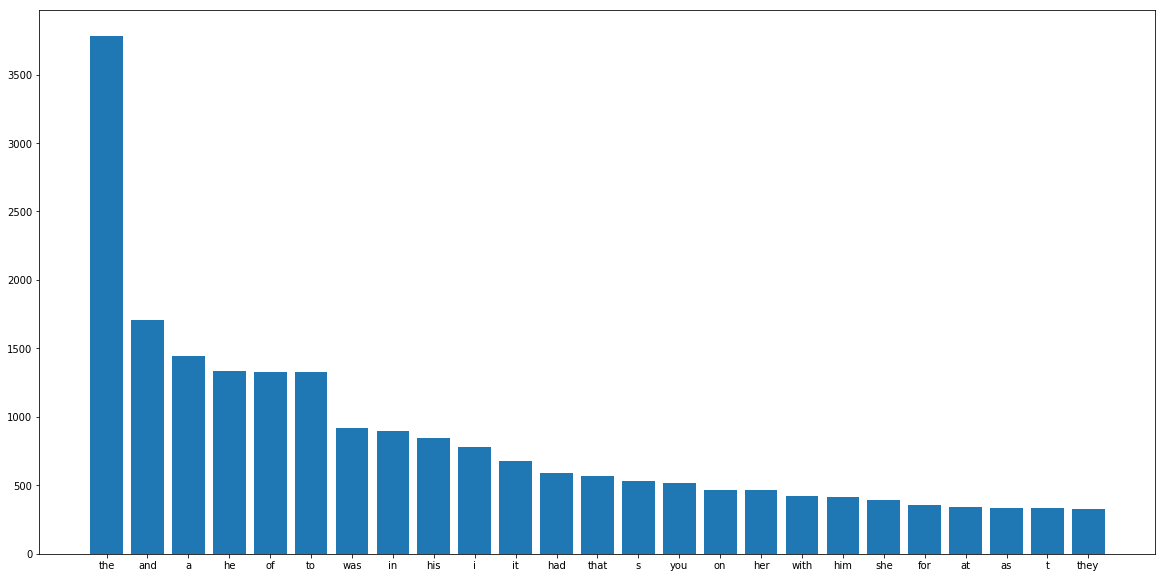

In [29]:
labels = [word[0] for word in word_counter.most_common(25)]
values = [word[1] for word in word_counter.most_common(25)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

We notice that some of the most common words above are not very interesting!

### stop-words

In this exersise you remove stopwords, find the most frequent bigrams, then display them on a barplot

In [30]:
# get the list of english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/igel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(stopwords))

179


In [32]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### 2.1 - filtering stop-words

In [33]:
# remove stopwords from the list of 'lowered_tokens'
# your code goes here
stopword_filtered_tokens = [token for token in 
                            lowered_tokens if token not in stopwords ]

### 2.2 - getting the bigrams

In [34]:
# turn your filtered list of unigrams into a list of bigrams, joint by whitespace
# to achieve that, use the function nltk.ngrams(your_tokens, 2)
# your code goes here

filtered_bigrams = [' '.join(ngram) for ngram in nltk.ngrams(stopword_filtered_tokens ,2) ]

In [35]:
ye = stopword_filtered_tokens[:6]
a = [' '.join(ngram) for ngram in nltk.ngrams(ye, 2)]
a

['dan morgan', 'morgan told', 'told would', 'would forget', 'forget ann']

### 2.3 - counting occurances

In [36]:
# now count the occurances of bigrams using a new Counter instance
# your code goes here
bigram_counter = collections.Counter(filtered_bigrams)

assert {'miss langford', 'mary jane', 'billy tilghman'}.issubset(set(map(operator.itemgetter(0), 
                                                                         bigram_counter.most_common(15))))
print('done')

done


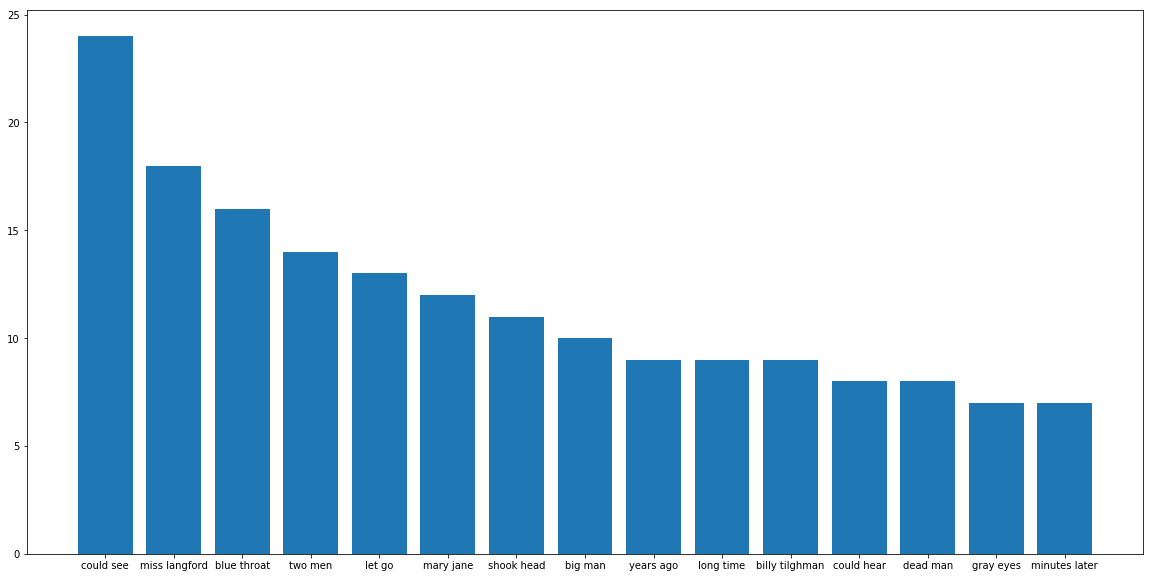

In [37]:
labels = [w[0] for w in bigram_counter.most_common(15)]
values = [w[1] for w in bigram_counter.most_common(15)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

## Home Exercise 1: vocabularies

In this exercise you write a function that builds a vocabulary from the provided text corpus. Then you use it to encode tokens into numeric form

### 3.1 - building a vocabulary

In [38]:
def build_vocabulary(tokens, max_size):
    """
    Builds a dictionary of at most max_size most frequent tokens from the supplied list of tokens.
    More frequent tokens should have a lower id, but that is not strictly required.
    Two special symbols 'NULL':0 and 'UNKN':1 should also be added to the dictionary.
    
    EXAMPLE:
    {
        'NULL': 0,
        'UNKN': 1,
        'the': 2,
        'and': 3,
        'a': 4,
        ...
    }
    """
    vocabulary = {}
    reserved_symbols = ["NULL", "UNKN"]
    
    # your code goes here

    return vocabulary

In [39]:
def build_vocabulary(tokens, max_size=20000):
    """
    Builds a vocabulary of at most max_size words from the supplied list of lists of tokens.
    If a word embedding model is provided, adds only the words present in the model vocabulary.
    """
    # your code goes here
    vocabulary = {}
    reserved_symbols = ["NULL", "UNKN"]
    
    counter = collections.Counter(tokens)
    
    freq_toks = counter.most_common(max_size-len(reserved_symbols)) # list of sets (work, occur)

    voc_words = [k[0] for k in freq_toks] # list of words

    for i, reserved in enumerate(reserved_symbols):
        vocabulary[reserved] = i

    for i, k in enumerate(voc_words):
        vocabulary[k] = i+len(reserved_symbols)

    return vocabulary

In [40]:
li = ['mek', 'erku', 4, 'mors']
di = {}
for i, num in enumerate(li):
    di[num] = i

In [41]:
di

{4: 2, 'erku': 1, 'mek': 0, 'mors': 3}

In [42]:
VOC_SIZE = 5000

my_vocabulary = build_vocabulary(lowered_tokens, VOC_SIZE)

assert len(my_vocabulary) == VOC_SIZE
assert {'NULL', 'UNKN'}.issubset(set(my_vocabulary.keys()))
assert set([w[0] for w in word_counter.most_common(VOC_SIZE-10)]).issubset(set(my_vocabulary.keys()))
print('done')

done


In [43]:
reverse_dictionary = {val: keey for keey, val in my_vocabulary.items()}

### 3.2 - encoding tokens

In [44]:
def vectorize_tokens(sentence, tokenizer, token_to_id, max_len):
    """
    Converts a list of tokens to a list of token ids using the supplied dictionary.
    Pads resulting list with NULL identifiers up to max_len length.
    """
    ids = []
    
    # STEP 1: convert sentence to a list of tokens
    # your code goes here
    tokens = tokenizer(sentence)
    
    # STEP 2: replace tokens with their identifiers from the vocabulary
    # If the token is not present in the vocabulary, replace it with UNKN identifier
    encoded_tokens = [token_to_id.get(token, token_to_id['UNKN']) 
     for token in tokens] 
    # token_to_id- n vocabularyn e, get-- ete chka, veradarcni UNKN-in hamapatasxan bary

    # STEP 3: pad the sequence id's with NULL identifiers until so that it's length is equal to max_len
      
    return encoded_tokens[:max_len]

In [45]:
MAX_LEN = 16
test_sentence = 'The animals thundered away into the moonlight , heading for the ridges .'
vectorized = vectorize_tokens(test_sentence,
                              tokenize_by_regex, my_vocabulary, MAX_LEN)


In [46]:
vectorized

[1, 1065, 1, 94, 43, 2, 1740, 1727, 22, 2, 4223]

In [47]:
assert len(vectorized) == MAX_LEN
assert [my_vocabulary.get(t, my_vocabulary['UNKN']) 
        for t in tokenize_by_regex(test_sentence)] + [0]*(MAX_LEN-len(tokenize_by_regex(test_sentence))) == vectorized
print('done')

AssertionError: 

### Exercise 4: one-hot encoding

In this exercise you create a function to compute sentence similarity, then build a simple Information Retrieval system

In [48]:
VOC_SIZE = 5000

adv_brown_sents = [' '.join(sent) for sent in nltk.corpus.brown.sents(categories='adventure')]
print(len(adv_brown_sents))
adv_brown_sents[:3]

4637


['Dan Morgan told himself he would forget Ann Turner .',
 'He was well rid of her .',
 "He certainly didn't want a wife who was fickle as Ann ."]

In [49]:
print(nltk.corpus.brown.sents(categories='adventure')[0])

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.']


In [50]:
# initialize the CountVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=VOC_SIZE, stop_words=stopwords, lowercase=True)

In [51]:
# builds the vocabulary from the data
tfidf_vectorizer.fit(adv_brown_sents)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={"didn't", 'does', 'above', 'being', 'with', 'below', 'before', "you'd", 'yourself', 'same', 'this', 'and', 'over', 'again', 'myself', 'were', 'an', 'which', 'she', 'are', 'how', "you've", 'these', 'am', 'yours', 'should', 'we', 'but', "wasn't", 'themselves', "that'll", 're', 'by', 't', '...uldn't", 'between', 'too', 'through', 'on', 'y', 'during', 'will', "mustn't", 'did', 'such', 'very'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [52]:
tfidf_vectorizer_vocab = dict(zip(range(len(tfidf_vectorizer.get_feature_names())),
                                  tfidf_vectorizer.get_feature_names()))

In [54]:
tfidf_vectorizer.get_feature_names()[:20]

['00',
 '10',
 '1895',
 '200',
 '21',
 '275',
 '30',
 '300',
 '600',
 'aaron',
 'able',
 'abruptly',
 'accepting',
 'accident',
 'accompanied',
 'account',
 'accused',
 'accusing',
 'accustomed',
 'ace']

In [57]:
# applies one-hot encoding to the provided data, transforming sentences into vectors
vectorized_sents = tfidf_vectorizer.transform(adv_brown_sents)

# the resulting matrix has shape (N_SAMPLES x VOC_SIZE)
vectorized_sents.shape

(4637, 5000)

Let's have a look at the sentence vector

In [58]:
# sentence
print(adv_brown_sents[0])

Dan Morgan told himself he would forget Ann Turner .


In [59]:
# sentence vector is almost all zeroes
print(vectorized_sents[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [65]:
# nonzero elements of the sentence vector
first_sent = vectorized_sents[0].nonzero()[1]
print(first_sent)

[4932 4389 4251 2021 1219  751  102]


In [66]:
# the words are the same, but the word order is lost, and stopwords are removed
[tfidf_vectorizer_vocab[wid] for wid in first_sent]

['would', 'turner', 'told', 'morgan', 'forget', 'dan', 'ann']

In [67]:
# we can now compute the similarity between sentences like so:
sent1vector = vectorized_sents[0]
sent10vector = vectorized_sents[10]
similarity = cosine_similarity(sent1vector, sent10vector)
print(similarity)

[[0.20980297]]


### 4.1 - sentence similarity

In [68]:
def onehot_sentence_similarity(sent1, sent2, vectorizer):
    """Encodes provided sentences using the 'vectorizer' object,
    then computes the cosine similarity between sentence vectors
    Outputs a real number between [0,1] """
    
    # CountVectorizer requires a list of sentences as input
    sent1_ = [sent1]
    sent2_ = [sent2]
    
    # your code goes here
    
    vectorized_sent1 = vectorizer.transform(sent1_)
    vectorized_sent2 = vectorizer.transform(sent2_)
    similarity = cosine_similarity(vectorized_sent1, vectorized_sent2)


    
    return similarity

In [69]:
test_sentence_1 = 'I like building robots'
test_sentence_2 = 'I also like building pillow fortresses'

In [71]:
print(onehot_sentence_similarity(test_sentence_1, test_sentence_2, tfidf_vectorizer))

[[0.81091811]]


### 4.2 - information retrieval

In [ ]:
class SearchEngine(object):
    def __init__(self, knowledge_base, voc_size=5000):
        """
        Implements a simple information retrieval system based on Tf-Idf text representation.
        """
        
        self.kbase = np.array(knowledge_base)
        self.vectorizer = TfidfVectorizer(max_features=voc_size)
        self.vectorized_kbase = self.vectorizer.fit_transform(knowledge_base)
        
    def search(self, query, top_k=3):
        """
        Retrieves the top-k documents from the knowledge_base most similar to given query
        """
        
        vectorized_query = self.vectorizer.transform([query])
        
        # your code goes here
        # STEP 1: compute similarities between query and all documents in knowledge base

        # STEP 2: sort the similarities to find most similar document indices
        # HINT: use np.argsort to do that
        
        # STEP 3: gets top-k most similar documents from self.kbase, returns them
        
        return results
        

In [186]:
class SearchEngine(object):
    def __init__(self, knowledge_base, voc_size=5000):
        """
        Implements a simple information retrieval system based on Tf-Idf text representation.
        """
        
        self.kbase = np.array(knowledge_base)
        self.vectorizer = TfidfVectorizer(max_features=voc_size)
        self.vectorized_kbase = self.vectorizer.fit_transform(knowledge_base)
        
    def search(self, query, top_k=3):
        """
        Retrieves the top-k documents from the knowledge_base most similar to given query
        """
        
        vectorized_query = self.vectorizer.transform([query])
        
        # your code goes here
        # STEP 1: compute similarities between query and all documents in knowledge base
        
        sim = cosine_similarity(self.vectorized_kbase, vectorized_query)
        sim.reshape(-1,1)
        print(sim.shape)
        
        # STEP 2: sort the similarities to find most similar document indices
        # HINT: use np.argsort to do that
        indic =  np.argsort(sim)
        print(indic)
        # STEP 3: gets top-k most similar documents from self.kbase, returns them
        top_indic = indic[ -top_k+1 :]
        print(top_indic)
        results   = [self.kbase[ind] for ind in top_indic]
        print(results)
        return results


In [187]:
se = SearchEngine(adv_brown_sents)

In [188]:
query1 = 'take it easy'
result1 = se.search(query1, top_k=3)[0]
# assert query1 in result1

query2 = 'uneasy feeling'
result2 = se.search(query2, top_k=2)[0]
# assert query2 in result2

print('done')

(4637, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [0]]
[array(['Dan Morgan told himself he would forget Ann Turner .'],
      dtype='<U754'), array(['Dan Morgan told himself he would forget Ann Turner .'],
      dtype='<U754')]
(4637, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]]
[array(['Dan Morgan told himself he would forget Ann Turner .'],
      dtype='<U754')]
done


In [121]:
print(len(result1))

4637


### Home Exercise 1: language models

In this exercise you build a 3-gram language model, then use it to generate grammaticaly valid text

In [189]:
model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
 
for sentence in tqdm(nltk.corpus.brown.sents()):
    for w1, w2, w3 in nltk.trigrams(sentence, pad_right=True, pad_left=True):
        # iterate over all trigrams, accumulate co-occurance counts
        model[(w1, w2)][w3] += 1

for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        # normalize counts to produce a valid probability distribution
        model[w1_w2][w3] /= total_count

100%|██████████| 57340/57340 [00:06<00:00, 9295.04it/s]


In [196]:
text = [None, None]
 
sentence_finished = False
 
while not sentence_finished:
    # introduce a stochastic variable
    r = random.random()
    accumulator = .0
    current_bigram = tuple(text[-2:])

    for word, pr in model[current_bigram].items():
        accumulator += pr
        
        # frequent trigrams are more likely to overflow accumulator:
        if accumulator >= r:
            text.append(word)
            break
 
    if text[-2:] == [None, None]:
        sentence_finished = True

print(' '.join([t for t in text if t]))

One ground of the amended Act provides that final Sunday at First Christian Church of England , which he may indeed have I realized how limited was his own picture books are enough for a time he moved up beside them .


### 5.1 By analogy, implement a 4-gram language model